## 베이스 모델

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Mnist 데이터셋
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련(학습) validation_split
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=64, verbose=1)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 3.6541 - accuracy: 0.7641 - val_loss: 0.7917 - val_accuracy: 0.8313
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.6250 - accuracy: 0.8549 - val_loss: 0.5688 - val_accuracy: 0.8843
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.4406 - accuracy: 0.8963 - val_loss: 0.4464 - val_accuracy: 0.8977
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.9141 - val_loss: 0.4051 - val_accuracy: 0.9050
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2968 - accuracy: 0.9242 - val_loss: 0.3709 - val_accuracy: 0.9173


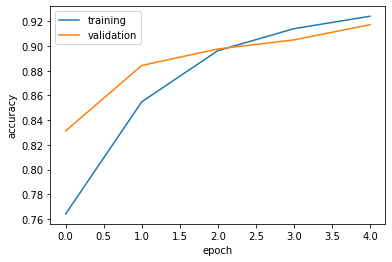

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

## Batch Normalization 레이어 추가

In [3]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,BatchNormalization

# Mnist 데이터셋
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련(학습) validation_split
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3217 - accuracy: 0.9041 - val_loss: 0.2221 - val_accuracy: 0.9451
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.1526 - accuracy: 0.9554 - val_loss: 0.1958 - val_accuracy: 0.9593
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.1138 - accuracy: 0.9660 - val_loss: 0.1766 - val_accuracy: 0.9608
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0890 - accuracy: 0.9730 - val_loss: 0.1945 - val_accuracy: 0.9631
Epoch 5/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.1927 - val_accuracy: 0.9642


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 54,282
Trainable params: 52,586
Non-trainable params: 1,696
_________________________________________________________________


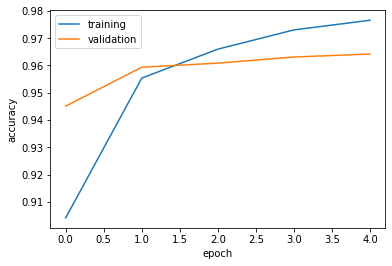

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

## Dropout 레이어 추가

In [6]:
# 라이브러리 불러오기
from tensorflow.keras.layers import Dropout

# Mnist 데이터셋
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련(학습) validation_split
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4959 - accuracy: 0.8487 - val_loss: 0.4554 - val_accuracy: 0.9408
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2893 - accuracy: 0.9127 - val_loss: 0.6415 - val_accuracy: 0.9540
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2410 - accuracy: 0.9263 - val_loss: 0.6317 - val_accuracy: 0.9575
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2111 - accuracy: 0.9355 - val_loss: 0.4660 - val_accuracy: 0.9622
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1988 - accuracy: 0.9390 - val_loss: 0.4503 - val_accuracy: 0.9649
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1852 - accuracy: 0.9409 - val_loss: 0.4626 - val_accuracy: 0.9666
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1759 - accuracy: 0.9453 - val_loss: 0.7679 - val_accuracy: 0.9672
Epoch 